In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other
 94% 252M/269M [00:00<00:00, 703MB/s] 
100% 269M/269M [00:00<00:00, 739MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/gender-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
!pip install tensorflow

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

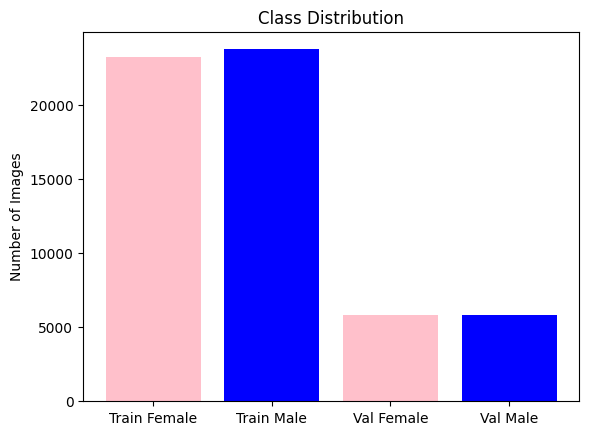

In [ ]:
# Count images in each folder
train_female = len(os.listdir('/content/Training/female'))
train_male = len(os.listdir('/content/Training/male'))
val_female = len(os.listdir('/content/Validation/female'))
val_male = len(os.listdir('/content/Validation/male'))

# Bar Plot
labels = ['Train Female', 'Train Male', 'Val Female', 'Val Male']
counts = [train_female, train_male, val_female, val_male]

plt.bar(labels, counts, color=['pink', 'blue', 'pink', 'blue'])
plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.show()

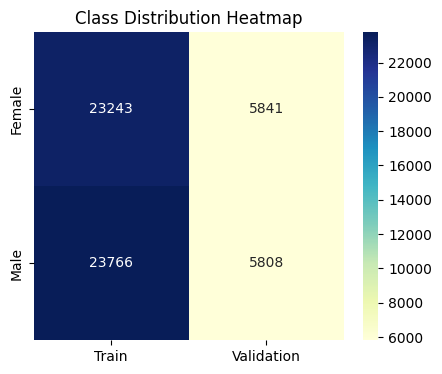

In [ ]:
# 2. Class Distribution Heatmap
df = pd.DataFrame({
    'Train': [train_female, train_male],
    'Validation': [val_female, val_male]
}, index=['Female', 'Male'])

plt.figure(figsize=(5,4))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Class Distribution Heatmap')
plt.show()

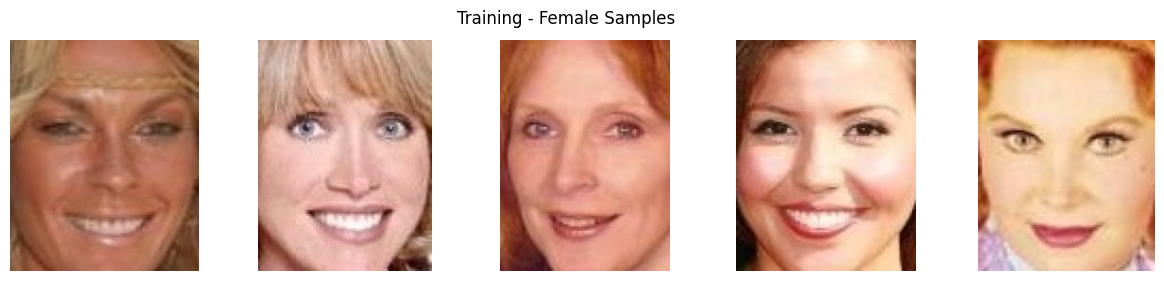

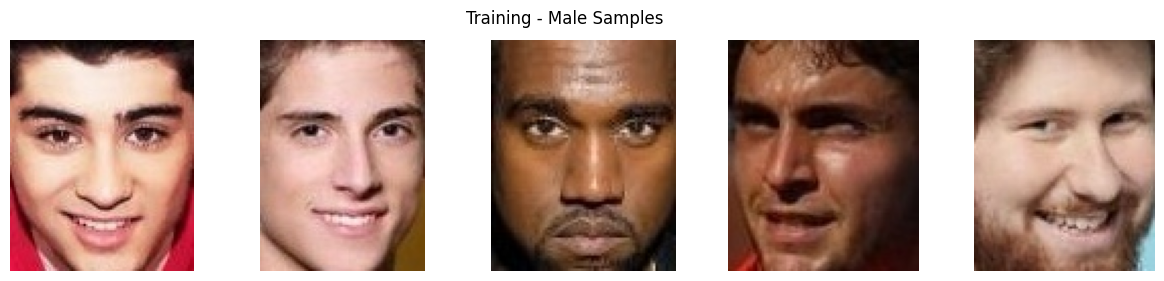

In [ ]:
# 3. Sample Images from Each Class
def show_samples(folder, title):
    files = os.listdir(folder)
    sample_files = random.sample(files, 5)

    plt.figure(figsize=(15,3))
    for i, file in enumerate(sample_files):
        img = Image.open(os.path.join(folder, file))
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

train_female_path = '/content/Training/female'
train_male_path = '/content/Training/male'

show_samples(train_female_path, 'Training - Female Samples')
show_samples(train_male_path, 'Training - Male Samples')

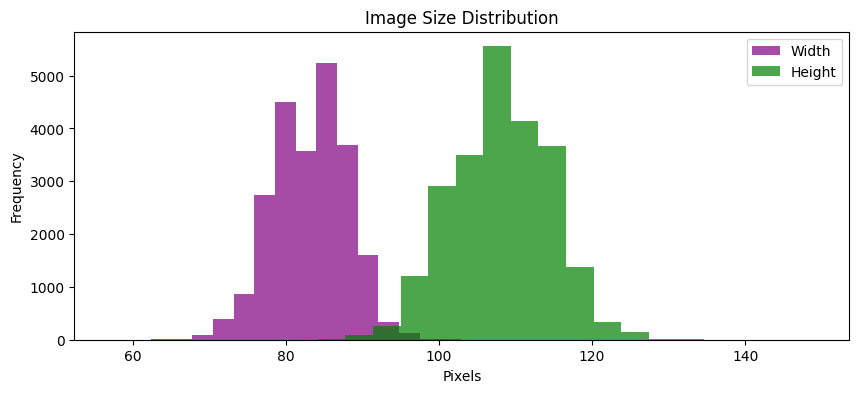

In [ ]:
# 4. Image Size Distribution
def image_size_distribution(folder):
    widths, heights = [], []
    for file in os.listdir(folder):
        img = Image.open(os.path.join(folder, file))
        width, height = img.size
        widths.append(width)
        heights.append(height)

    plt.figure(figsize=(10,4))
    plt.hist(widths, bins=20, alpha=0.7, label='Width', color='purple')
    plt.hist(heights, bins=20, alpha=0.7, label='Height', color='green')
    plt.title('Image Size Distribution')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


image_size_distribution(train_female_path)

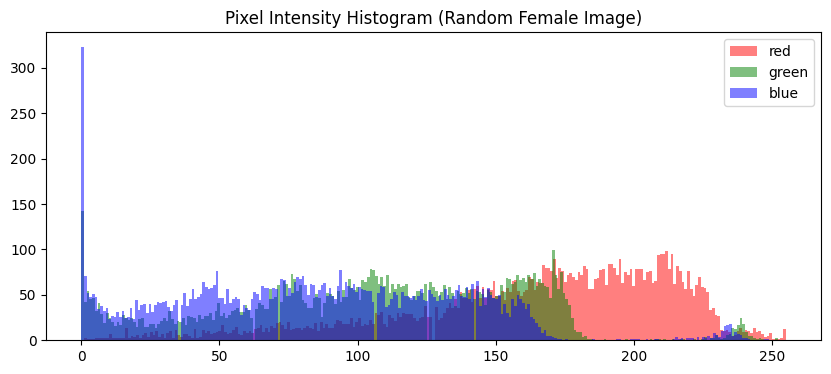

In [ ]:
# 5. Pixel Intensity Histogram (1 Image)
img_path = os.path.join(train_female_path, random.choice(os.listdir(train_female_path)))
img = Image.open(img_path).convert('RGB')
pixels = np.array(img)

plt.figure(figsize=(10,4))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.hist(pixels[:,:,i].ravel(), bins=256, color=colors[i], alpha=0.5, label=colors[i])
plt.title('Pixel Intensity Histogram (Random Female Image)')
plt.legend()
plt.show()

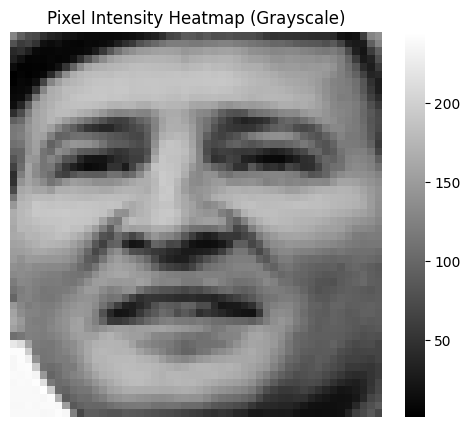

In [ ]:
# 6. Pixel Intensity Heatmap
img_resized = img.resize((50, 50)).convert('L')  # Grayscale for heatmap
plt.figure(figsize=(6,5))
sns.heatmap(np.array(img_resized), cmap='gray')
plt.title('Pixel Intensity Heatmap (Grayscale)')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Random Images Using ImageDataGenerator
# Automatically shuffles/randomizes images
train_path = '/content/Training'
val_path = '/content/Validation'

# Preprocessing and real-time random augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_gen = ImageDataGenerator(rescale=1./255)

# Flow from directories (automatically labels male/female based on folder name)
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',   # because it's male vs female (binary classification)
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 282s 187ms/step - accuracy: 0.7998 - loss: 0.4145 - val_accuracy: 0.9407 - val_loss: 0.1628
Epoch 2/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 265s 180ms/step - accuracy: 0.9204 - loss: 0.2068 - val_accuracy: 0.9437 - val_loss: 0.1497
Epoch 3/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 265s 181ms/step - accuracy: 0.9328 - loss: 0.1757 - val_accuracy: 0.9575 - val_loss: 0.1125
Epoch 4/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 263s 179ms/step - accuracy: 0.9425 - loss: 0.1553 - val_accuracy: 0.9606 - val_loss: 0.1085
Epoch 5/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 265s 180ms/step - accuracy: 0.9468 - loss: 0.1440 - val_accuracy: 0.9614 - val_loss: 0.1080
Epoch 6/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 266s 181ms/step - accuracy: 0.9494 - loss: 0.1383 - val_accuracy: 0.9617 - val_loss: 0.0998
Epoch 7/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 263s 179ms/step - accuracy: 0.9515 - loss: 0.1330 - val_accuracy: 0.9658 - val_loss: 0.0995
Epoch 8/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 266s 181ms/step - ac

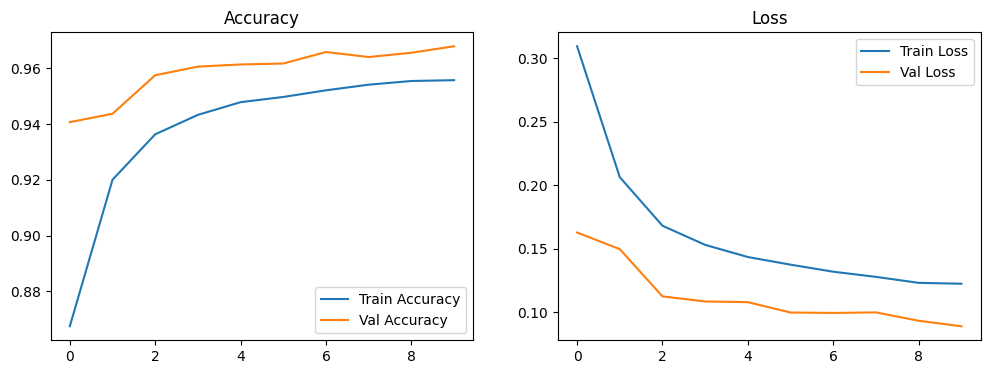

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


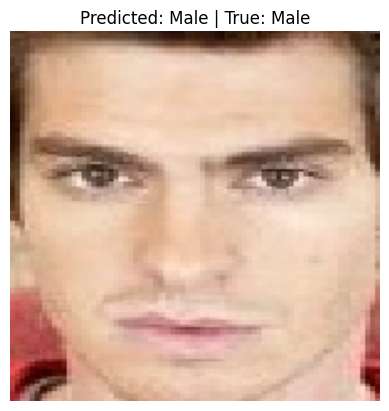

In [ ]:
# Predict on a Random Image
# Load and preprocess image
# Choose one random image from either female or male validation folder
base_path = '/content/Validation'
category = random.choice(['female', 'male'])
img_name = random.choice(os.listdir(f'{base_path}/{category}'))
img_path = f'{base_path}/{category}/{img_name}'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
prediction = model.predict(img_array)
predicted_class = 'Male' if prediction[0][0] > 0.5 else 'Female'

# Display the image with prediction and true label
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_class} | True: {category.capitalize()}')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


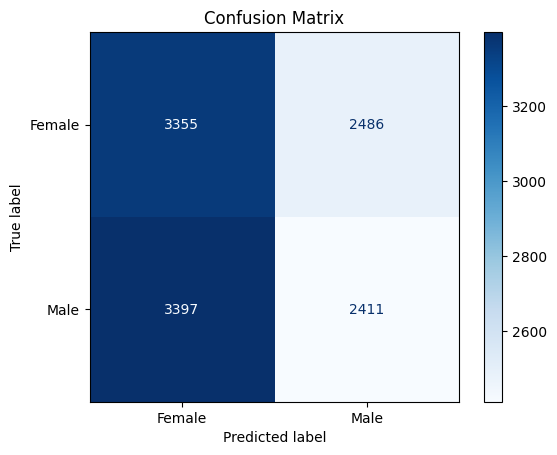

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Female", "Male"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save model architecture + weights + optimizer
model.save('gender_classification_model.keras')


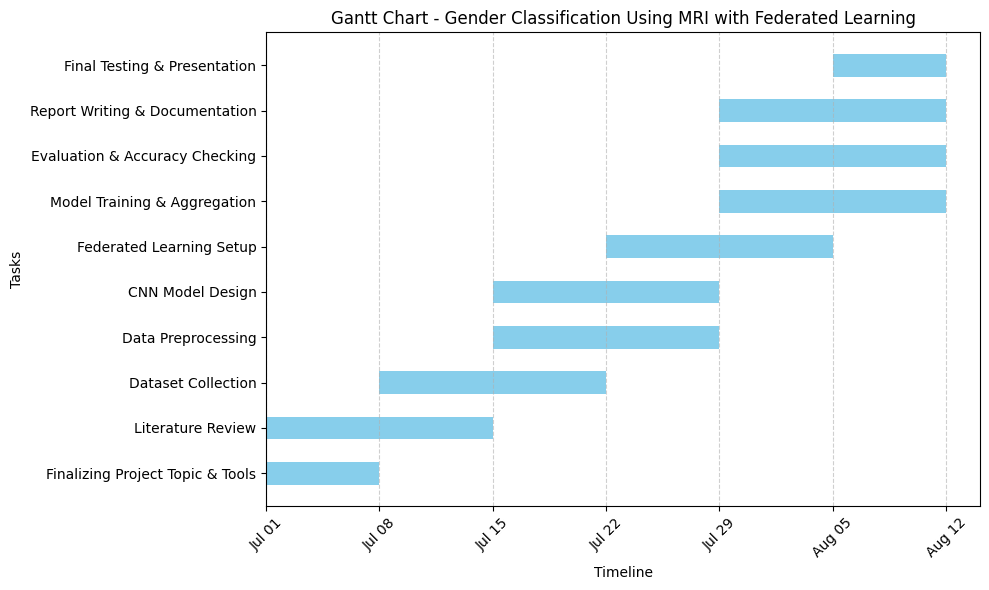

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define tasks and their durations
tasks = {
    "Finalizing Project Topic & Tools": (0, 1),
    "Literature Review": (0, 2),
    "Dataset Collection": (1, 2),
    "Data Preprocessing": (2, 2),
    "CNN Model Design": (2, 2),
    "Federated Learning Setup": (3, 2),
    "Model Training & Aggregation": (4, 2),
    "Evaluation & Accuracy Checking": (4, 2),
    "Report Writing & Documentation": (4, 2),
    "Final Testing & Presentation": (5, 1),
}

start_date = datetime(2025, 7, 1)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each task
for i, (task, (start_week, duration)) in enumerate(tasks.items()):
    start = start_date + timedelta(weeks=start_week)
    end = start + timedelta(weeks=duration)
    ax.barh(task, end - start, left=start, height=0.5, color="skyblue")

# Format the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.set_title("Gantt Chart - Gender Classification Using MRI with Federated Learning")
ax.set_xlabel("Timeline")
ax.set_ylabel("Tasks")
plt.tight_layout()

plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


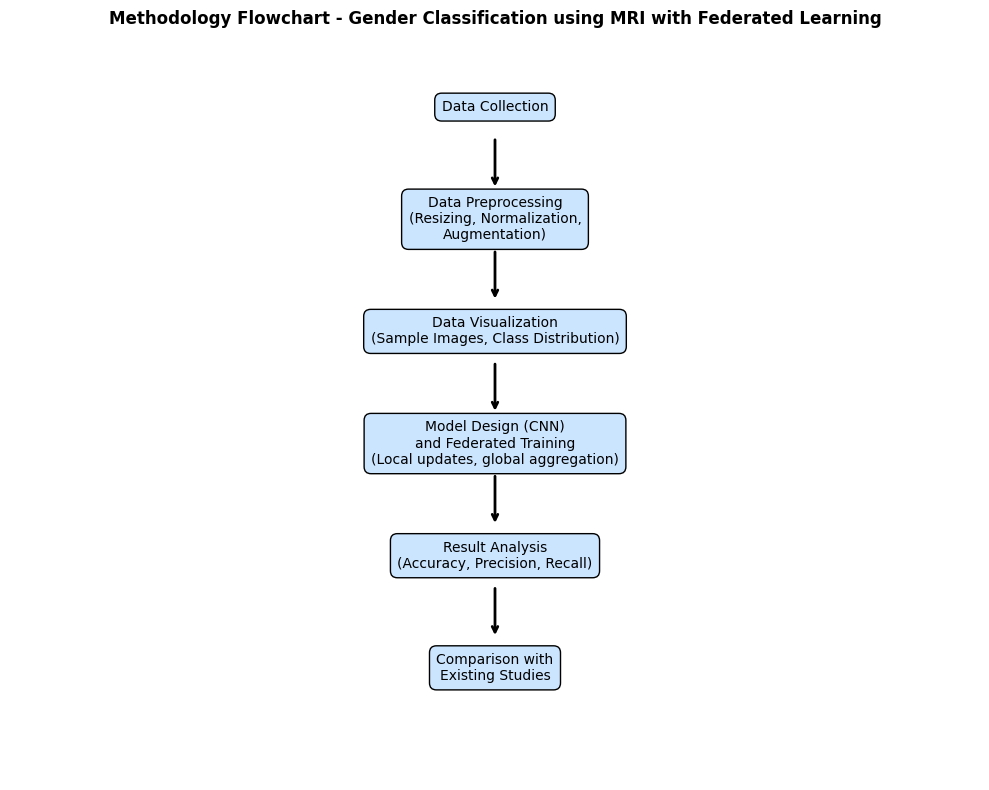

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

# Define box properties
box_style = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="#cce5ff")

# Define coordinates and texts for each step (top to bottom)
steps = [
    ("Data Collection", (0.5, 0.9)),
    ("Data Preprocessing\n(Resizing, Normalization,\nAugmentation)", (0.5, 0.75)),
    ("Data Visualization\n(Sample Images, Class Distribution)", (0.5, 0.6)),
    ("Model Design (CNN)\nand Federated Training\n(Local updates, global aggregation)", (0.5, 0.45)),
    ("Result Analysis\n(Accuracy, Precision, Recall)", (0.5, 0.3)),
    ("Comparison with\nExisting Studies", (0.5, 0.15))
]

# Adjust the arrow to start at the bottom edge of the current box and end at the top edge of the next box
box_height = 0.08  # approx. height of each box

for i, (text, (x, y)) in enumerate(steps):
    ax.text(x, y, text, ha='center', va='center', fontsize=10, bbox=box_style)
    if i < len(steps) - 1:
        next_y = steps[i + 1][1][1]
        ax.annotate('',
                    xy=(x, next_y + box_height / 2),       # top of next box
                    xytext=(x, y - box_height / 2),         # bottom of current box
                    arrowprops=dict(arrowstyle="->", lw=2, color='black'))

# Title
plt.title("Methodology Flowchart - Gender Classification using MRI with Federated Learning", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


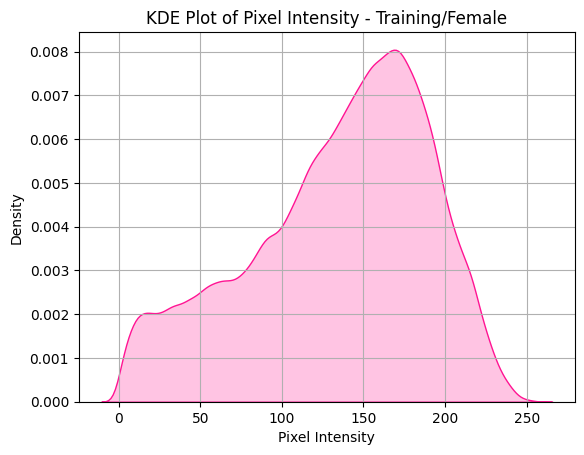

In [ ]:
import cv2
import numpy as np
from glob import glob

images = glob('/content/Training/female/*.jpg')[:100]  # Limit to 100 images
pixel_data = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        pixel_data.extend(img.flatten())

sns.kdeplot(pixel_data, color='deeppink', fill=True)
plt.title('KDE Plot of Pixel Intensity - Training/Female')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()



🌐 Global Round 1/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 90.15%

🌐 Global Round 2/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 94.37%

🌐 Global Round 3/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 95.49%

🌐 Global Round 4/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.09%

🌐 Global Round 5/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.27%

🌐 Global Round 6/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.52%

🌐 Global Round 7/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.52%

🌐 Global Round 8/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.58%

🌐 Global Round 9/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.50%

🌐 Global Round 10/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.51%

🌐 Global Round 11/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.60%

🌐 Global Round 12/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.72%

🌐 Global Round 13/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.41%

🌐 Global Round 14/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.44%

🌐 Global Round 15/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.58%

🌐 Global Round 16/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.43%

🌐 Global Round 17/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.57%

🌐 Global Round 18/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.51%

🌐 Global Round 19/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.56%

🌐 Global Round 20/20
  🧑‍💻 Client 1 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 2 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  🧑‍💻 Client 3 local training...
Found 12536 validated image filenames belonging to 2 classes.
Found 3133 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 11649 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  ✅ Global model accuracy: 96.49%


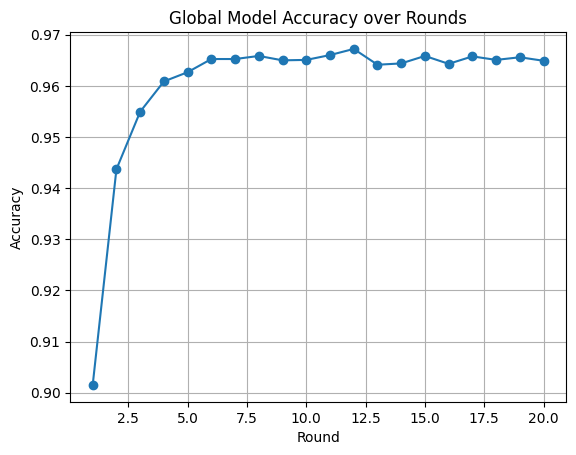

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# STEP 1: Create dataframe (no label encoding)
def create_df(path):
    data = []
    for category in ['female', 'male']:
        category_path = os.path.join(path, category)
        for img_name in os.listdir(category_path):
            data.append({'path': os.path.join(category_path, img_name), 'gender': category})
    return pd.DataFrame(data)

# STEP 2: Model architecture
def get_model():
    model = Sequential([
        # ⚠️ Fixed the warning: added Input layer explicitly
        tf.keras.Input(shape=(150, 150, 3)),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# STEP 3: Prepare client data
df = create_df('/content/Training')  # 🔄 Keep gender as string
df = df.sample(frac=1).reset_index(drop=True)
client_data = np.array_split(df, 3)

# STEP 4: Federated learning loop
global_model = get_model()
global_weights = global_model.get_weights()

global_rounds = 20
local_epochs = 2
acc_history = []

for rnd in range(global_rounds):
    local_weights_list = []
    print(f"\n🌐 Global Round {rnd+1}/{global_rounds}")

    for i, client_df in enumerate(client_data):
        print(f"  🧑‍💻 Client {i+1} local training...")

        datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        train_gen = datagen.flow_from_dataframe(
            client_df, x_col='path', y_col='gender',
            target_size=(150, 150), batch_size=32, class_mode='binary', subset='training'
        )
        val_gen = datagen.flow_from_dataframe(
            client_df, x_col='path', y_col='gender',
            target_size=(150, 150), batch_size=32, class_mode='binary', subset='validation'
        )

        local_model = get_model()
        local_model.set_weights(global_weights)
        local_model.fit(train_gen, epochs=local_epochs, validation_data=val_gen, verbose=0)

        local_weights_list.append(local_model.get_weights())

    # Federated averaging
    new_weights = []
    for weights in zip(*local_weights_list):
        new_weights.append(np.mean(weights, axis=0))

    global_model.set_weights(new_weights)
    global_weights = new_weights

    # Evaluate on validation set
    val_gen_global = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
        create_df('/content/Validation'),
        x_col='path', y_col='gender',
        target_size=(150, 150), batch_size=32, class_mode='binary'
    )
    loss, acc = global_model.evaluate(val_gen_global, verbose=0)
    acc_history.append(acc)
    print(f"  ✅ Global model accuracy: {acc*100:.2f}%")

# Plot accuracy
plt.plot(range(1, global_rounds + 1), acc_history, marker='o')
plt.title('Global Model Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
# Save the trained global model
global_model.save("gender_federated_model.h5")
print("✅ Model saved as 'gender_federated_model.h5'")


✅ Model saved as 'gender_federated_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("gender_federated_model.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


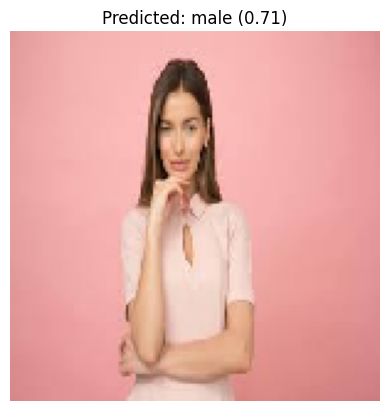

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_gender(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    gender = 'male' if prediction > 0.5 else 'female'

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {gender} ({prediction:.2f})")
    plt.show()

# Example
predict_gender("/content/images.jpeg", model)


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d cashutosh/gender-classification-dataset
!unzip -q gender-classification-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other
 94% 254M/269M [00:00<00:00, 753MB/s] 
100% 269M/269M [00:00<00:00, 805MB/s]


In [ ]:
#Step 1: Imports and Setup
import os
import numpy as np
import random
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import os
import shutil
import random

def split_data(src_train_folder, src_val_folder, dest_folder_base, clients=4):  # changed clients=4
    for label in ['female', 'male']:
        train_files = os.listdir(os.path.join(src_train_folder, label))
        val_files = os.listdir(os.path.join(src_val_folder, label))

        random.shuffle(train_files)
        random.shuffle(val_files)

        train_chunk_size = len(train_files) // clients
        val_chunk_size = len(val_files) // clients

        for i in range(clients):
            train_dest = os.path.join(dest_folder_base, f'client{i+1}', 'train', label)
            val_dest = os.path.join(dest_folder_base, f'client{i+1}', 'val', label)

            os.makedirs(train_dest, exist_ok=True)
            os.makedirs(val_dest, exist_ok=True)

            train_chunk = train_files[i*train_chunk_size : (i+1)*train_chunk_size]
            val_chunk = val_files[i*val_chunk_size : (i+1)*val_chunk_size]

            for f in train_chunk:
                shutil.copy(os.path.join(src_train_folder, label, f), train_dest)
            for f in val_chunk:
                shutil.copy(os.path.join(src_val_folder, label, f), val_dest)

# Call the function with 4 clients
train_path = '/content/Training'
val_path = '/content/Validation'
dest_base = '/content/clients_data'

split_data(train_path, val_path, dest_base, clients=4)  # changed to 4

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()


from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_data_generators(client_id):
    base_dir = f'/content/clients_data/client{client_id}'
    train_dir = base_dir + '/train'
    val_dir = base_dir + '/val'

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2]
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle=True
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle=False
    )

    return train_generator, val_generator


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 5: Federated Learning Training Loop
import numpy as np
from tensorflow.keras.models import clone_model

# Assuming you already have create_cnn_model() function defined from Step 3

def create_cnn_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Number of federated rounds and local epochs per client
global_rounds = 12
local_epochs = 5
num_clients = 4
mu = 0.01  # For FedProx

def fed_prox_loss(local_model, global_weights, mu):
    prox_loss = 0.0
    local_weights = local_model.get_weights()
    for lw, gw in zip(local_weights, global_weights):
        prox_loss += np.sum(np.square(lw - gw))
    return mu * prox_loss

def train_local_model(client_id, global_weights, method='fedavg'):
    train_gen, val_gen = get_data_generators(client_id)
    local_model = create_cnn_model()
    local_model.set_weights(global_weights)

    if method == 'fedprox':
        loss_fn = tf.keras.losses.BinaryCrossentropy()
        optimizer = tf.keras.optimizers.Adam()

        for epoch in range(local_epochs):
            print(f"   Client {client_id} - Epoch {epoch+1}/{local_epochs}")
            for x_batch, y_batch in train_gen:
                with tf.GradientTape() as tape:
                    y_pred = local_model(x_batch, training=True)
                    loss = loss_fn(y_batch, y_pred)
                    loss += fed_prox_loss(local_model, global_weights, mu)
                grads = tape.gradient(loss, local_model.trainable_variables)
                optimizer.apply_gradients(zip(grads, local_model.trainable_variables))
                if train_gen.batch_index == 0: break
    else:
        local_model.fit(train_gen, epochs=local_epochs, validation_data=val_gen, verbose=1)

    return local_model.get_weights(), val_gen

def federated_training(method='fedavg'):
    print(f"\n===== Starting {method.upper()} training =====")
    global_model = create_cnn_model()
    global_weights = global_model.get_weights()
    acc_history = []

    for rnd in range(global_rounds):
        print(f"\n--- {method.upper()} Round {rnd+1}/{global_rounds} ---")
        local_weights = []

        for client_id in range(1, num_clients + 1):
            print(f" Client {client_id} training...")
            lw, _ = train_local_model(client_id, global_weights, method=method)
            local_weights.append(lw)

        # Average weights
        new_weights = []
        for weights_tuple in zip(*local_weights):
            new_weights.append(np.mean(weights_tuple, axis=0))

        global_model.set_weights(new_weights)
        global_weights = new_weights

        _, val_gen = get_data_generators(1)
        loss, acc = global_model.evaluate(val_gen, verbose=0)
        print(f" Global model accuracy after round {rnd+1}: {acc*100:.2f}%")
        acc_history.append(acc)

    # Save the trained global model after all rounds
    global_model.save("federated_global_model.h5")
    print("✅ Model saved as 'federated_global_model.h5'")


    return acc_history

# Train all 3 methods
fedavg_acc = federated_training(method='fedavg')
fedprox_acc = federated_training(method='fedprox')
fedcnn_acc = federated_training(method='fedcnn')  # Same behavior as FedAvg here

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1, global_rounds+1), fedavg_acc, label='FedAvg', marker='o')
plt.plot(range(1, global_rounds+1), fedprox_acc, label='FedProx', marker='s')
plt.plot(range(1, global_rounds+1), fedcnn_acc, label='FedCNN', marker='^')
plt.title('Global Model Accuracy over Federated Rounds')
plt.xlabel('Federated Round')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


===== Starting FEDAVG training =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- FEDAVG Round 1/12 ---
 Client 1 training...


NameError: name 'get_data_generators' is not defined

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/federated_global_model.h5", compile=False)
model.build()
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("federated_global_model.h5", compile=False)
print("Model expects input shape:", model.input_shape)


Model expects input shape: (None, 150, 150, 3)
